In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from glob import glob
import os
import gc
# experiment = 'results/experiment_sklearn-*.csv'
# experiment = 'results/experiment_sklearn-benchmark5-data-mock_experiment_recs-random-average-knn_ninit-100-1000-10000_nrecs-1-5-10_iters-1000_ntrials-1000.csv'
iters = 1000
nrecs= 10
ninit = 1
experiment = 'results/experiment_sklearn-*ninit-'+str(ninit)+'*nrecs-'+str(nrecs)+'*iters-'+str(iters)+'*csv'
savename = 'results/figs/'+experiment.split('/')[-1].replace('*','').split('.')[0]
filename =  experiment.replace('*','.') + '.all'
frames = []
from tqdm import tqdm
batch_size = round(len(glob(experiment))/10)
batch = batch_size 
df_exp = pd.DataFrame()
for i,f in enumerate(tqdm(glob(experiment))):
#     print(f)
#     if int(f.split('trial-')[-1].split('.csv')[0]) < 500:
    df = pd.read_csv(f)
    df = df[['n_recs','n_init','iteration','delta_bal_accuracy','recommender','ranking','iters']]
#     df['winner'] = f.split('_wins')[0].split('_')[-1]
#     df['n_init'] = f.split('ninit-')[-1].split('_')[0]
#     df['n_recs'] = f.split('nrecs-')[-1].split('_')[0]
    frames.append(df)
    if i > batch:
        print('writing batch','batch=',batch)
        batch += batch_size
        df_exp_batch = pd.concat(frames)
        df_exp = df_exp.append(df_exp_batch)
        del df_exp_batch
        frames = []
    gc.collect()
#         if os.path.exists(filename):
#             with open(filename,'a') as out:
#                 df_exp.to_csv(out,header=False,index=False)
#         else:
#             df_exp.to_csv(filename,index=False)
#         print('recommenders:',df_exp.recommender.unique())
#         print('trials:',len(df_exp.trial.unique()))
#         print('n_init:',df_exp.n_init.unique())
#         print('n_recs:',df_exp.n_recs.unique())
#         print('iters:',df_exp.iters.unique())
#         print(df_exp.columns)


 10%|█         | 1403/14028 [05:20<41:15,  5.10it/s]  

writing batch batch= 1403


 20%|█▉        | 2805/14028 [08:47<09:03, 20.65it/s]  

writing batch batch= 2806


 30%|███       | 4209/14028 [12:21<36:48,  4.45it/s]  

writing batch batch= 4209


 40%|████      | 5612/14028 [15:51<24:14,  5.78it/s]  

writing batch batch= 5612


 50%|█████     | 7016/14028 [24:35<10:40, 10.95it/s]  

writing batch batch= 7015


 60%|██████    | 8418/14028 [27:03<08:32, 10.95it/s]   

writing batch batch= 8418


 70%|███████   | 9822/14028 [36:13<42:54,  1.63it/s]  

writing batch batch= 9821


 80%|████████  | 11225/14028 [49:40<26:28,  1.77it/s]  

writing batch batch= 11224


KeyboardInterrupt: 

# balanced accuracy deltas for all predictions

<Figure size 1440x720 with 0 Axes>

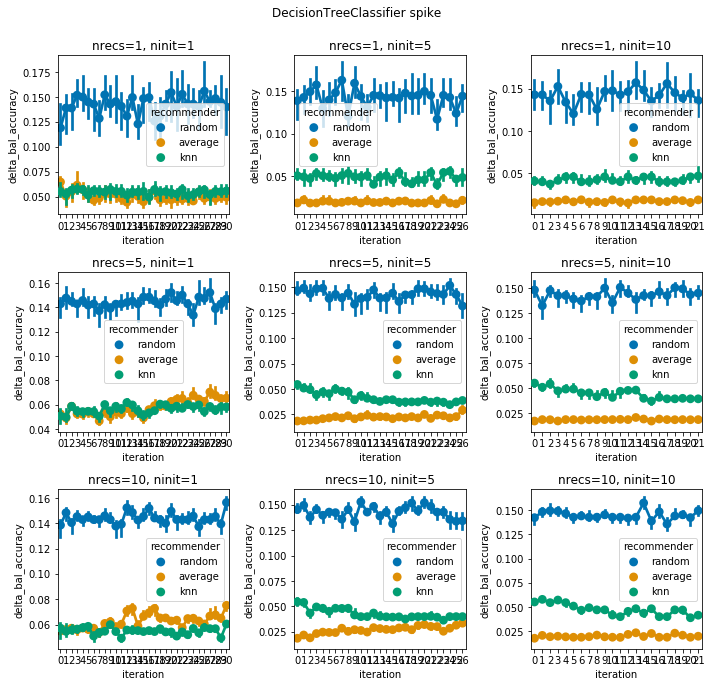

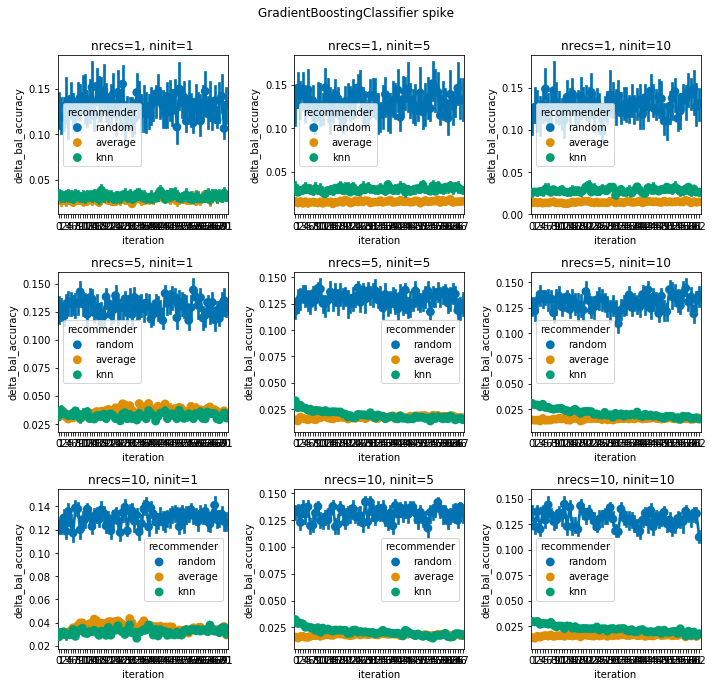

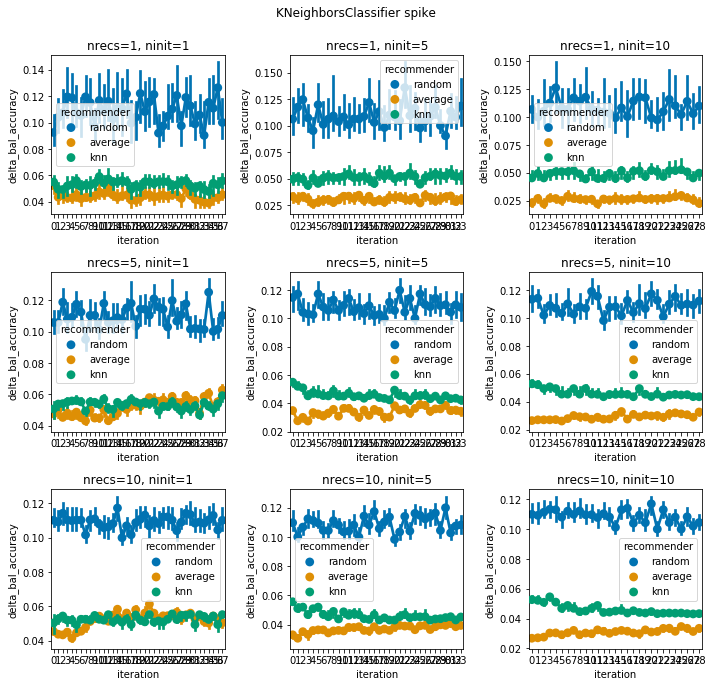

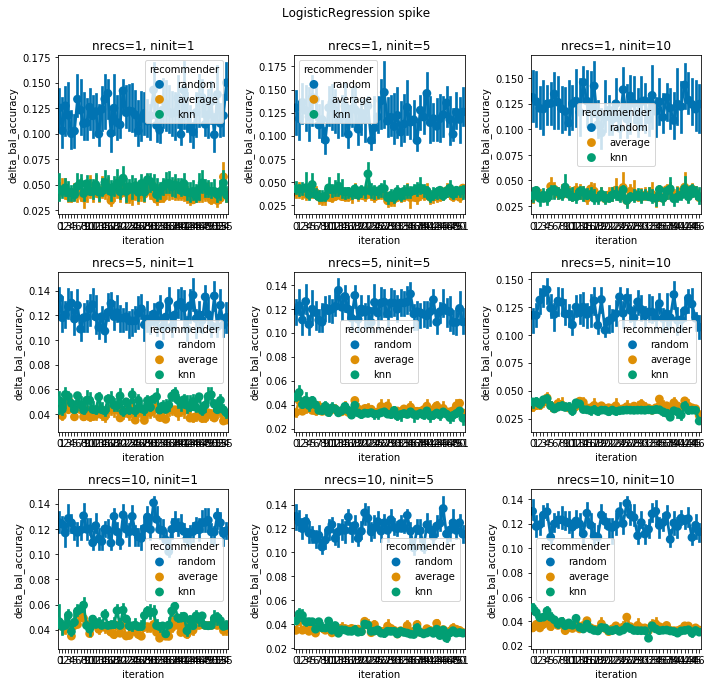

In [55]:
plt.figure(figsize=(20,10))
sb.set_palette('colorblind',3)
recs_count = len(df_exp.n_recs.unique())
init_count = len(df_exp.n_init.unique())
import numpy as np

for winner,dfg in df_exp.groupby('winner'):
    h = plt.figure(figsize=(10,10))
    h.suptitle(winner+' spike')
    i = 1
    for nrecs,dfr in dfg.groupby('n_recs'):
        for ninit,dfi in dfr.groupby('n_init'):
            ax = h.add_subplot(recs_count, init_count, i)
            sb.pointplot(data=dfi,
                         x='iteration',y='delta_bal_accuracy',
                         hue='recommender',
                         scatter=False,
                         ax = ax,
                         n_boot=100,
                         estimator=np.median)
            name = 'nrecs='+str(nrecs)+', ninit='+str(ninit)
            ax.set_title(name)
            i += 1
    h.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(savename+ '_delta_bal_accuracy.pdf')

In [101]:
np.linspace(0,100,5)

array([  0.,  25.,  50.,  75., 100.])

In [1]:
sb.set_palette('colorblind',3)
recs_count = len(df_exp.n_recs.unique())
init_count = len(df_exp.n_init.unique())
import numpy as np
iters=1000
# for winner,dfg in df_exp.groupby('winner'):
h = plt.figure(figsize=(20,20))
# h.suptitle(winner+' spike')
i = 1
# for nrecs,dfr in dfg.groupby('n_recs'):
for nrecs,dfr in df_exp.groupby('n_recs'):
    for ninit,dfi in dfr.groupby('n_init'):
        ax = h.add_subplot(recs_count, init_count, i)
        sb.pointplot(data=dfi,
                     x='iteration',y='ranking',
                     hue='recommender',
                     scatter=False,
                     ax = ax,
                     ci = 'sd',
                     n_boot=100,
                     estimator=np.median)
        ax.set_xticks([int(i) for i in np.linspace(0,iters,5)])
        ax.set_xticklabels([str(int(i)) for i in np.linspace(0,iters,5)])
        name = 'nrecs='+str(nrecs)+', ninit='+str(ninit)
        ax.set_title(name)
        i += 1
h.tight_layout()
plt.savefig(savename+ '_ranking.pdf')

NameError: name 'sb' is not defined

NameError: name 'iters' is not defined

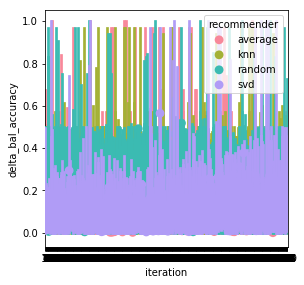

In [2]:
sb.set_palette('colorblind',3)
recs_count = len(df_exp.n_recs.unique())
init_count = len(df_exp.n_init.unique())
import numpy as np
iters=1000
# for winner,dfg in df_exp.groupby('winner'):
h = plt.figure(figsize=(20,20))
# h.suptitle(winner+' spike')
i = 1
# for nrecs,dfr in dfg.groupby('n_recs'):
for nrecs,dfr in df_exp.groupby('n_recs'):
    for ninit,dfi in dfr.groupby('n_init'):
        ax = h.add_subplot(recs_count, init_count, i)
        sb.pointplot(data=dfi,
                     x='iteration',y='delta_bal_accuracy',
                     hue='recommender',
                     scatter=False,
                     ax = ax,
                     n_boot=100,
                     estimator=np.median)
        name = 'nrecs='+str(nrecs)+', ninit='+str(ninit)
        ax.set_xticks([int(i) for i in np.linspace(0,iters,5)])
        ax.set_xticklabels([str(int(i)) for i in np.linspace(0,iters,5)])
        ax.set_ylim(0,0.35)
        ax.set_title(name)
        i += 1
h.tight_layout()
plt.savefig(savename+ '_delta_bal_accuracy.pdf')

In [ ]:
len(df_exp['trial'].unique())

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# generate figure of heatmap showing counts of which ML methods are recommended over time
# experiment = '../experiment_sklearn-benchmark5-data-mock_experimentknn-random-average-meta_10recs_200trials_10init.csv'
# experiment = '../experiment_random-average_100recs_500trials_1init.csv'
accumulate = False

df = pd.read_csv(experiment)
n_trials = df['trial'].max()
ave_count_mat = np.zeros((len(df['ml-rec'].unique()),len(df['iteration'].unique())))                     
rand_count_mat = np.zeros((len(df['ml-rec'].unique()),len(df['iteration'].unique())))
algs = list(df['ml-rec'].unique())
iterations = df['iteration'].unique()
print('algs:',algs)
print('ave_count_mat',ave_count_mat.shape)
# recommenders = ['random','average','meta']
recommenders = df.recommender.unique()
for recommender in recommenders:
    ave_count_mat = np.zeros((len(df['ml-rec'].unique()),len(df['iteration'].unique())))                     
    rand_count_mat = np.zeros((len(df['ml-rec'].unique()),len(df['iteration'].unique())))
    dfa = df.loc[df['recommender']==recommender,:]

    dfa.groupby('iteration').count() #.groupby('ml-rec').count()

    for index,row in dfa.iterrows():
        ave_count_mat[algs.index(row['ml-rec']),row['iteration']] += 1/n_trials
    # cumulative sum
    if accumulate:
        for i,a in enumerate(ave_count_mat): 
            ave_count_mat[i] = np.cumsum(a)
    #print('ave_count_mat:',ave_count_mat)

    h = plt.figure(figsize=(10, 15))
    ax = h.gca()
    tmp = ax.matshow(ave_count_mat,cmap=plt.cm.coolwarm)
    # sb.heatmap(ave_count_mat)#,
               #cmap=sb.cubehelix_palette(500, light=0.95, dark=0.15),
    #            square=False, annot=True, vmin=0., vmax=1.0,
    #            xticklabels=iterations, yticklabels=algs, cbar=False)
    cbar=plt.colorbar(tmp,ax=ax,orientation='vertical',shrink=0.1)
    cbar.set_label('Recommendations')
    ax.set_yticks(np.arange(len(algs)))
    ax.set_yticklabels(algs)
    ax.set_xlabel('Dataset', fontsize=8)
    ax.set_ylabel(recommender + ' Recommender', fontsize=12)
    #plt.title('ML Recommendations over many datasets', fontsize=18)
    ax.set_aspect(4)
    h.tight_layout()
    if accumulate:
        h.savefig(experiment[:-4]+'_'+recommender+'_heatmap_cumulative.pdf', bbox_inches='tight')
    else:
        h.savefig(experiment[:-4]+'_'+recommender+'_heatmap.pdf', bbox_inches='tight')

plt.show()